In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import initializers

Using TensorFlow backend.


### Load & Preprocessing data

In [3]:
from scipy.io import arff

data = arff.loadarff('HTRU_2.arff')
df = pd.DataFrame(data[0])
X = df.drop('class', axis=1)
y = df["class"]

In [4]:
print(f"X shape: {X.shape};") 
print(f"y shape: {y.shape};")

X shape: (17898, 8);
y shape: (17898,);


In [5]:
df.describe()

Profile_mean  Profile_stdev  Profile_skewness  Profile_kurtosis  \
count  17898.000000   17898.000000      17898.000000      17898.000000   
mean     111.079968      46.549532          0.477857          1.770279   
std       25.652935       6.843189          1.064040          6.167913   
min        5.812500      24.772042         -1.876011         -1.791886   
25%      100.929688      42.376018          0.027098         -0.188572   
50%      115.078125      46.947479          0.223240          0.198710   
75%      127.085938      51.023202          0.473325          0.927783   
max      192.617188      98.778911          8.069522         68.101622   

            DM_mean      DM_stdev   DM_skewness   DM_kurtosis  
count  17898.000000  17898.000000  17898.000000  17898.000000  
mean      12.614400     26.326515      8.303556    104.857709  
std       29.472897     19.470572      4.506092    106.514540  
min        0.213211      7.370432     -3.139270     -1.976976  
25%        1.923077     14.437332      5.781506     34.960504  
50%        2.801839     18.461316      8.433515     83.064556  
75%        5.464256     28.428104     10.702959    139.309330  
max      223.392141    110.642211     34.539844   1191.000837

In [6]:
df.head()

Profile_mean  Profile_stdev  Profile_skewness  Profile_kurtosis   DM_mean  \
0    140.562500      55.683782         -0.234571         -0.699648  3.199833   
1    102.507812      58.882430          0.465318         -0.515088  1.677258   
2    103.015625      39.341649          0.323328          1.051164  3.121237   
3    136.750000      57.178449         -0.068415         -0.636238  3.642977   
4     88.726562      40.672225          0.600866          1.123492  1.178930   

    DM_stdev  DM_skewness  DM_kurtosis class  
0  19.110426     7.975532    74.242225  b'0'  
1  14.860146    10.576487   127.393580  b'0'  
2  21.744669     7.735822    63.171909  b'0'  
3  20.959280     6.896499    53.593661  b'0'  
4  11.468720    14.269573   252.567306  b'0'

In [7]:
df.columns

Index(['Profile_mean', 'Profile_stdev', 'Profile_skewness', 'Profile_kurtosis',
       'DM_mean', 'DM_stdev', 'DM_skewness', 'DM_kurtosis', 'class'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Profile_mean      17898 non-null  float64
 1   Profile_stdev     17898 non-null  float64
 2   Profile_skewness  17898 non-null  float64
 3   Profile_kurtosis  17898 non-null  float64
 4   DM_mean           17898 non-null  float64
 5   DM_stdev          17898 non-null  float64
 6   DM_skewness       17898 non-null  float64
 7   DM_kurtosis       17898 non-null  float64
 8   class             17898 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


### Features correlation

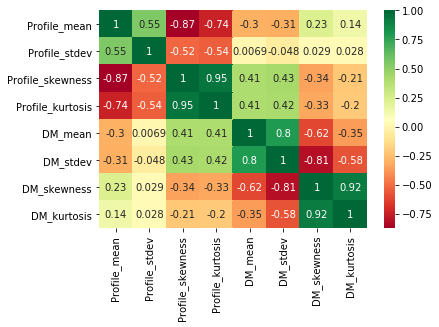

In [9]:
top_corr_features = df.corr().index
sns.heatmap(X[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Scatter plots

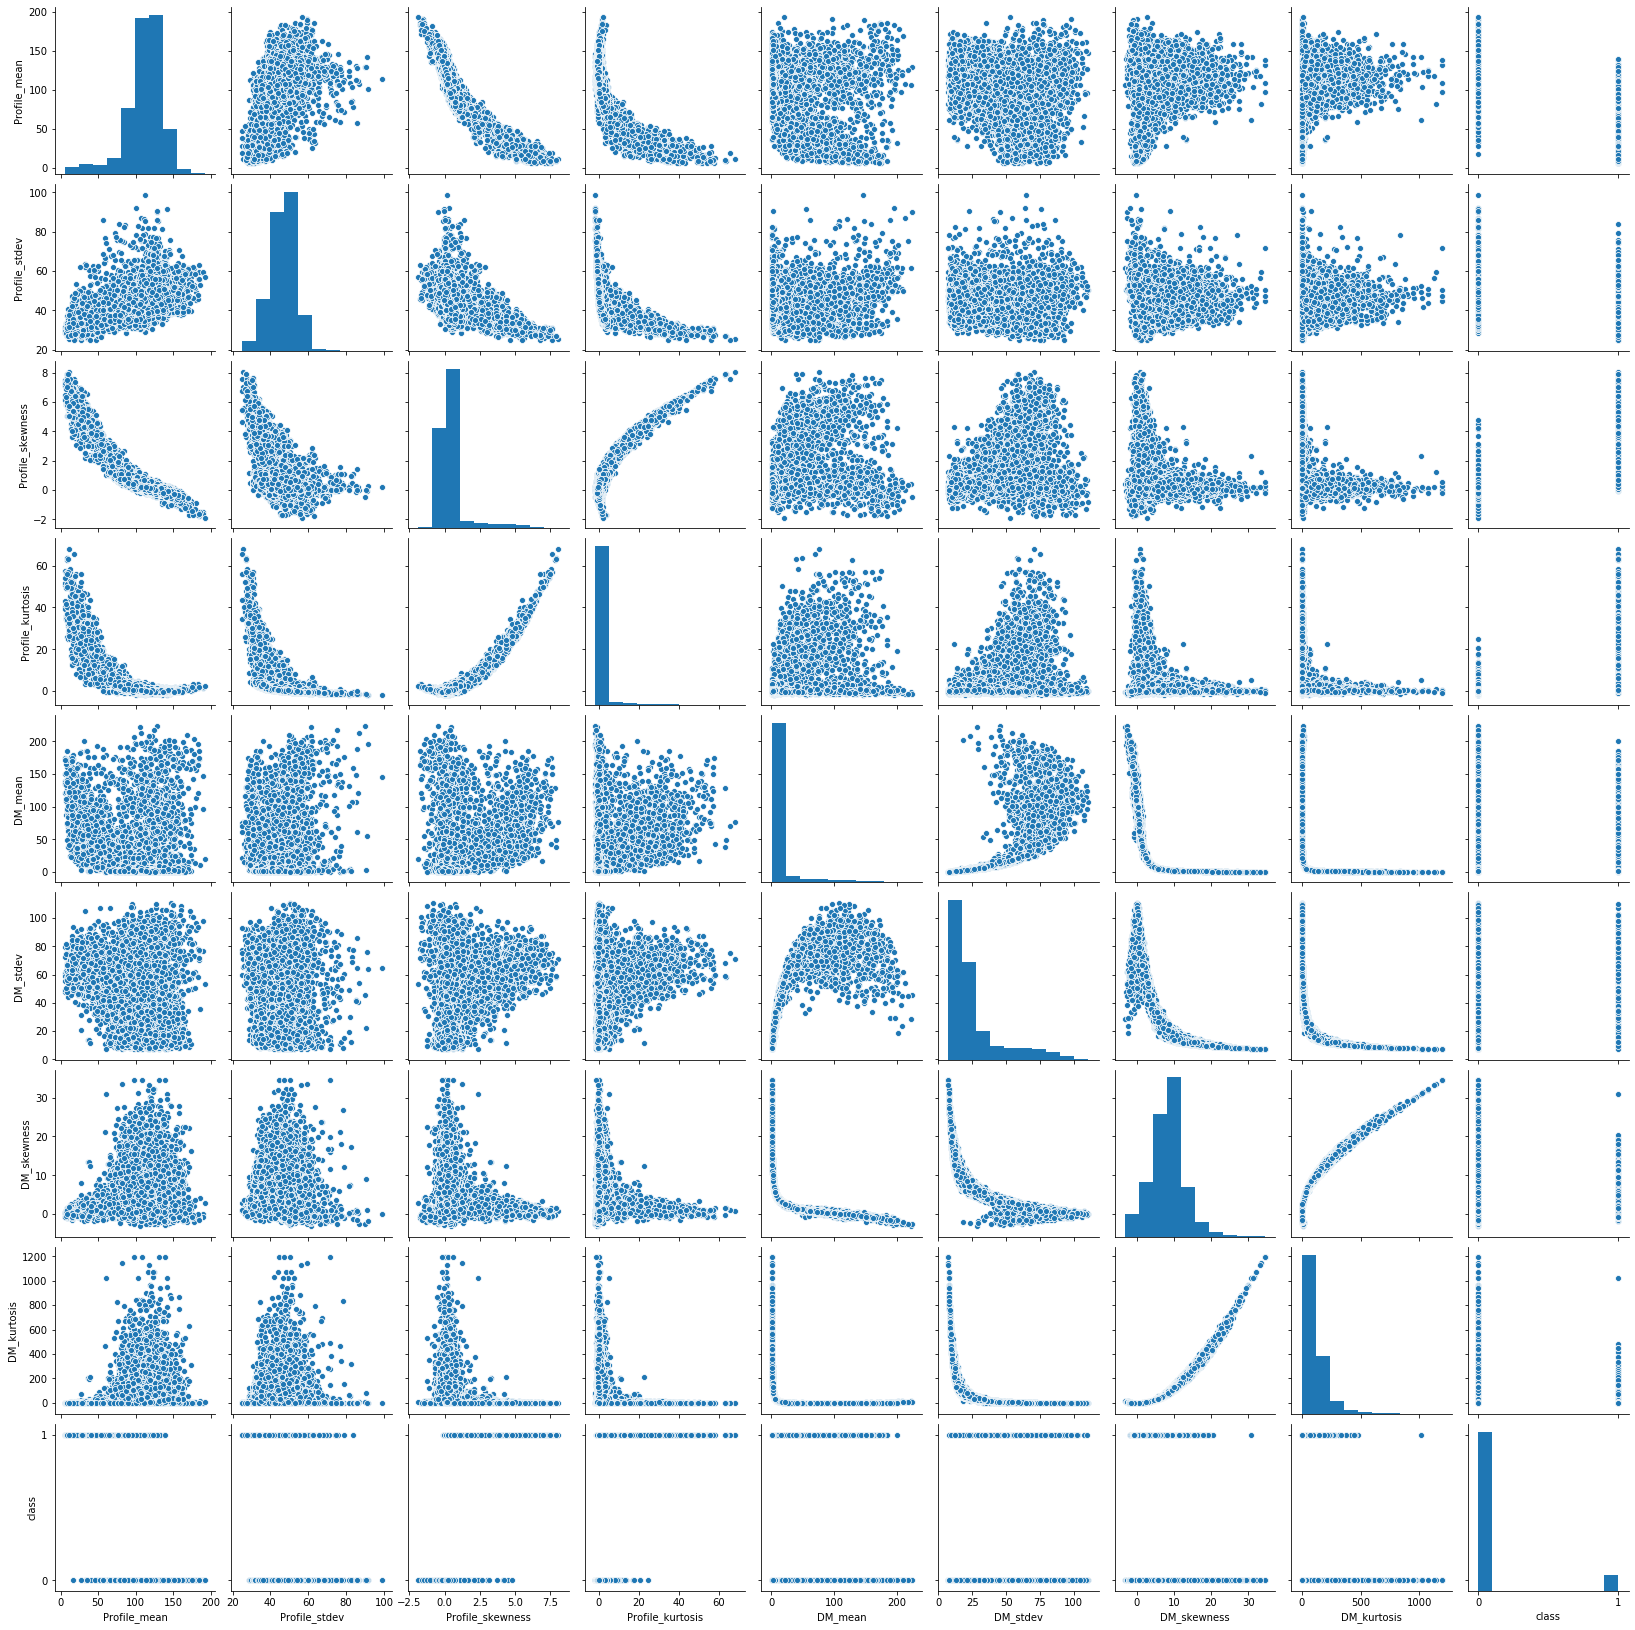

In [10]:
sns.pairplot(df)

### Split data on train test set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
print(f"X_train shape: {X.shape}; y_train shape: {y.shape};")
print(f"X_test shape: {X.shape};  y_test shape: {y.shape};")

X_train shape: (17898, 8); y_train shape: (17898,);
X_test shape: (17898, 8);  y_test shape: (17898,);


### Function for creating model for specific hyperparameters

In [13]:
def build_model(var_activation='relu', var_optimizer='adam'):
    """ Uses arguments to build Keras model. """
    kernel_init = initializers.TruncatedNormal(mean=0, stddev=0.01, seed=42)
    bias_init = initializers.Constant(value=1e-3)

    model = Sequential()
    model.add(Dense(24, input_dim=8, activation=var_activation, kernel_initializer=kernel_init, bias_initializer=bias_init))
    model.add(Dense(8, activation=var_activation, kernel_initializer=kernel_init, bias_initializer=bias_init))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer=var_optimizer, metrics=['accuracy'])
    return model

### Layers summary

In [14]:
model_ = build_model()
model_.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 24)                216       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 200       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 425
Trainable params: 425
Non-trainable params: 0
_________________________________________________________________


### List of hyperparameters

In [15]:
_activations=['sigmoid', 'tanh','relu']
_optimizers=['sgd','adam']
_batch_size=[128, 64, 32]
_epochs=[10, 20]

params=dict(var_activation=_activations,
            var_optimizer=_optimizers,
            batch_size=_batch_size,
            epochs=_epochs)
print(params)

{'var_activation': ['sigmoid', 'tanh', 'relu'], 'var_optimizer': ['sgd', 'adam'], 'batch_size': [128, 64, 32], 'epochs': [10, 20]}


### Hyperparameters tunning with GridSearchCV

In [16]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model_search = KerasClassifier(build_fn=build_model, verbose=0)
grid = GridSearchCV(model_search, param_grid=params, cv=2, n_jobs=1)

In [17]:
%%time
grid.fit(X_train, y_train)

Wall time: 5min 16s


GridSearchCV(cv=2, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x00000157A0AE0348>,
             iid='deprecated', n_jobs=1,
             param_grid={'batch_size': [128, 64, 32], 'epochs': [10, 20],
                         'var_activation': ['sigmoid', 'tanh', 'relu'],
                         'var_optimizer': ['sgd', 'adam']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [18]:
params = grid.best_params_
res = [print(f"{key}: {val}") for key, val in params.items()]

batch_size: 32
epochs: 20
var_activation: sigmoid
var_optimizer: adam


### Training Neural Network on the best hyperparameters

In [19]:
model = build_model(var_activation=params["var_activation"], 
                     var_optimizer=params["var_optimizer"])
model.fit(X_train,
          y_train, 
          batch_size=params["batch_size"],
          epochs=params["epochs"])

Epoch 1/20
14318/14318 [==============================] - 1s 82us/step - loss: 0.1089 - accuracy: 0.8854
Epoch 2/20
14318/14318 [==============================] - 1s 65us/step - loss: 0.0468 - accuracy: 0.9673
Epoch 3/20
14318/14318 [==============================] - 1s 64us/step - loss: 0.0348 - accuracy: 0.9737
Epoch 4/20
14318/14318 [==============================] - 1s 62us/step - loss: 0.0277 - accuracy: 0.9747
Epoch 5/20
14318/14318 [==============================] - 1s 65us/step - loss: 0.0247 - accuracy: 0.9751
Epoch 6/20
14318/14318 [==============================] - 1s 64us/step - loss: 0.0231 - accuracy: 0.9751
Epoch 7/20
14318/14318 [==============================] - 1s 65us/step - loss: 0.0219 - accuracy: 0.9755
Epoch 8/20
14318/14318 [==============================] - 1s 65us/step - loss: 0.0214 - accuracy: 0.9753
Epoch 9/20
14318/14318 [==============================] - 1s 63us/step - loss: 0.0209 - accuracy: 0.9755
Epoch 10/20
14318/14318 [==============================

In [20]:
cost, accuracy = model.evaluate(X_test, y_test)
print("Cost: ", cost)
print('Accuracy: %.2f' % (accuracy*100))

3580/3580 [==============================] - 0s 35us/step
Cost:  0.01820844565674288
Accuracy: 97.82


### Make a few predictions

In [21]:
predictions = model.predict(X_test)
rounded = [round(x[0], 3) for x in predictions]
print(rounded[0:10])

[0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.013, 0.241, 0.955, 0.013]
